# Package documentation

PhysioFit is available as a library that you can import directly in your Python scripts:

In [ ]:
import physiofit

Here we will walk you through the different ways of accessing the package. For more information on the object methods available for the PhysioFitter or the Input/Output Handler, please refer to the librairy section of the documentation.

#### Initializing the IOHandler

The IOHandler is the preferred object to communicate with the PhysioFitter. It is designed to help you manage data imports and exports before and after having run your fitting jobs. 

The first step is to initialize the Handler:

In [1]:
from physiofit.base.io import IoHandler

io_handler = IoHandler(source="local")

As you can see, the only parameter that the Handler accepts on initialization is the "source" which is by default set to local. The idea behind this is that the Handler can be used in multiple contexts and will evolve with time. The initial version of Physiofit 2.0 only contains the logic for local usage, but later we can imagine adding logic for usage in flux calculation pipelines and workflows, or usage on servers.


#### Importing your data as tsv


In Physiofit 2.0, there are two ways of initializing the fitter object that will run your flux calculation. The first is by using the "local_in" method that accepts a string or Path object that points to your tabulated data. It also accepts all the keyword arguments that will be passed on to the Fitter object, of which it also handles the initialization. Here we will access the example data that comes with the package:

In [2]:
import pathlib

data_path = pathlib.Path(r"./test_data.tsv")
io_handler.local_in(data_path=data_path)

2022-03-10 10:54:45,392 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Initializing Weight matrix...

2022-03-10 10:54:45,397 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Weight Matrix:
[[0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]]

2022-03-10 10:54:45,398 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Initializing bounds...

2022-03-10 10:54:45,399 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Bounds: ((0.01, 50), (0.01, 50), (-50, 50), (1e-06, 50), (-50, 50), (1e-06, 50))

2022-03-10 10:54:45,412 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
Configuration file saved in: C:\Users\legregam\Documents\Projets\PhysioFit\docs\docs_res\config_file.json


On initialization, the handler will generate a **config_file.json** and export the run parameters to it.

In [3]:
with open(r"C:\Users\legregam\Documents\Projets\PhysioFit\docs\docs_res\config_file.json", "r") as f:
    print(f.read())

{
    "conc_biom_bounds": [
        0.01,
        50
    ],
    "conc_met_bounds": [
        1e-06,
        50
    ],
    "debug_mode": false,
    "deg": null,
    "flux_biom_bounds": [
        0.01,
        50
    ],
    "flux_met_bounds": [
        -50,
        50
    ],
    "iterations": 100,
    "mc": true,
    "path_to_data": "C:\\Users\\legregam\\Documents\\Projets\\PhysioFit\\docs\\test_data.tsv",
    "t_lag": false,
    "vini": 0.04,
    "weight": [
        0.2,
        0.5,
        0.5
    ]
}


#### Importing your data from a json configuration file (recommended)

The second way of importing your data and setting up your fitter is by using the *"launch_from_json"* method that accepts a **string** or a **bytes file**. The *fitter* will then internally call the *"read_json_config"* method, initialize the path towards your data and finally call the *"local_in"* function that will initialize the *fitter*

In [5]:
io_handler.launch_from_json(r"C:\Users\legregam\Documents\Projets\PhysioFit\docs\docs_res\config_file.json")

2022-03-09 17:12:07,727 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Initializing Weight matrix...

2022-03-09 17:12:07,727 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Weight Matrix:
[[0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]
 [0.2 0.5 0.5]]

2022-03-09 17:12:07,742 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Initializing bounds...



#### Run the flux calculation

The next step is to launch the optimization of the fluxes. This will enable us to get the *optimized parameters* and the *simulated dataframe*. You can find a link towards the optimization method [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb).

In [3]:
io_handler.fitter.optimize()

2022-03-10 10:54:48,892 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
Running optimization...

2022-03-10 10:54:49,085 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Optimization results: 
      fun: 1.230728449066384
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.35729002, -0.03179832,  0.00117899,  0.00301863, -0.00066398,
       -0.0007462 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1624
      nit: 175
     njev: 232
   status: 0
  success: True
        x: array([ 0.02486933,  0.63785081, -6.06889672, 13.9950446 ,  2.01439447,
        0.21404609])

2022-03-10 10:54:49,086 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
X_0 = 0.02486933271960968

2022-03-10 10:54:49,087 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
mu = 0.6378508099684295

2022-03-10 10:54:49,089 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
Glc_q = -6.06889671527352

2022-03-10 10:54:49,090 - PhysioFit_Logger.base.fitter

We can access the parameters in the *fitter* by accessing the corresponding attribute in the *parameter stats* dictionnary...

In [5]:
io_handler.fitter.parameter_stats["optimal"]

array([ 0.02486933,  0.63785081, -6.06889672, 13.9950446 ,  2.01439447,
        0.21404609])

... or by accessing directly the result from the *optimization function results* (this will also show the residual, jacobian and other more advanced information)

In [6]:
io_handler.fitter.optimize_results

      fun: 1.230728449066384
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.35729002, -0.03179832,  0.00117899,  0.00301863, -0.00066398,
       -0.0007462 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1624
      nit: 175
     njev: 232
   status: 0
  success: True
        x: array([ 0.02486933,  0.63785081, -6.06889672, 13.9950446 ,  2.01439447,
        0.21404609])

It is also possible to get the *optimized parameter vector* from the optimization results by accessing it's x attribute:

In [8]:
io_handler.fitter.optimize_results.x

array([ 0.02486933,  0.63785081, -6.06889672, 13.9950446 ,  2.01439447,
        0.21404609])

The *simulated data* can also be accessed after the optimization has been performed:

In [4]:
io_handler.fitter.simulated_data

,X,Glc,Ace
Time,,,
1.350000,NaN,13.671876,0.321312
1.694722,0.073304,NaN,NaN
1.916667,NaN,13.428140,0.402214
2.300278,0.107864,NaN,NaN
2.698333,0.139041,NaN,NaN
2.866667,NaN,12.758796,0.624383
3.436111,0.222597,NaN,NaN
3.821111,0.284557,NaN,NaN
4.000000,NaN,11.196971,1.142786


As we can see above, the simulated data contains a number of NaN values. This is because Physiofit **can detect when input data contains NaN values** (if biomass and metabolite concentrations were calculated from different sampling points) and will thus keep that in mind during and after optimization.

#### Monte-Carlo sensitivity analysis and khi2 test

The next step in the extracellular flux calculation process is to apply the Monte-Carlo sensitivity analysis on our simmulated data using the optimized parameters. To do so is very simple:

In [5]:
io_handler.fitter.monte_carlo_analysis()

2022-03-10 11:11:21,915 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Running monte carlo analysis. Number of iterations: 100

2022-03-10 11:11:28,906 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Optimized parameters statistics:
{'optimal': array([ 0.02486933,  0.63785081, -6.06889672, 13.9950446 ,  2.01439447,
        0.21404609]), 'mean': array([ 0.02666438,  0.64218772, -6.31911788, 13.99019957,  2.01937781,
        0.24968638]), 'sd': array([0.01342889, 0.08755595, 1.06948783, 0.32597459, 0.44177296,
       0.18447179]), 'median': array([ 0.02385465,  0.63941769, -6.19220146, 13.97601157,  1.98116387,
        0.23285916]), 'CI_2.5': array([ 1.04608290e-02,  4.77885648e-01, -8.48897376e+00,  1.33389230e+01,
        1.23399946e+00,  1.00000000e-06]), 'CI_97.5': array([ 0.06152013,  0.79962731, -4.4566361 , 14.62966973,  2.7836405 ,
        0.60064472])}

2022-03-10 11:11:28,908 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - Simulated matrix lower confidence inter

As we can see, we have now generated statistics around our simulated data points. We can access these statistics through the *parameter stats* attribute of the fitter:

In [13]:
for parameter in io_handler.fitter.parameter_stats.keys():
    print(f"{parameter}: {io_handler.fitter.parameter_stats[parameter]}\n")

optimal: [ 0.02486933  0.63785081 -6.06889672 13.9950446   2.01439447  0.21404609]

mean: [ 0.02666438  0.64218772 -6.31911788 13.99019957  2.01937781  0.24968638]

sd: [0.01342889 0.08755595 1.06948783 0.32597459 0.44177296 0.18447179]

median: [ 0.02385465  0.63941769 -6.19220146 13.97601157  1.98116387  0.23285916]

CI_2.5: [ 1.04608290e-02  4.77885648e-01 -8.48897376e+00  1.33389230e+01
  1.23399946e+00  1.00000000e-06]

CI_97.5: [ 0.06152013  0.79962731 -4.4566361  14.62966973  2.7836405   0.60064472]



For running the khi2 test and checking if our simulation fits the data well:

In [14]:
io_handler.fitter.khi2_test()

2022-03-10 11:47:50,967 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - khi2 test results:
khi2 value: 1.230728449066384
Number of measurements: 23
Number of parameters to fit: 6
Degrees of freedom: 17
p-value = 7.810019921271921e-08

2022-03-10 11:47:50,968 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - At level of 95% confidence, the model fits the data good enough with respect to the provided measurement SD. Value: 7.810019921271921e-08


#### Exporting the data and plots

The final leg of this tutorial will be focused on the export of the calculated data and the associated plots. To do this, we use the function *"local_out"* that is our go-to method for handling outputs in a local context. The function accepts 3 arguments as parameters:

- "data": This will tell the handler to output the optimized parameters data 

- "plots": This will tell the handler to output the plots individually in svg files

- "pdf": This will tell the handler to ouput the plots grouped in a pdf file

The function will also generate a **config.json** file with the run parameters.

2022-03-10 16:22:55,052 - PhysioFit_Logger.base.fitter.PhysioFitter - INFO - 
Configuration file saved in: C:\Users\legregam\Documents\Projets\PhysioFit\docs\docs_res\config_file.json


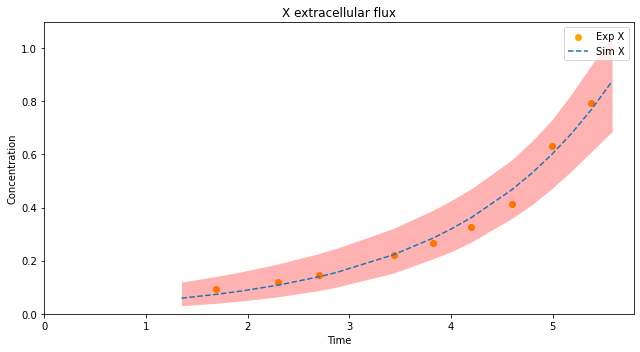

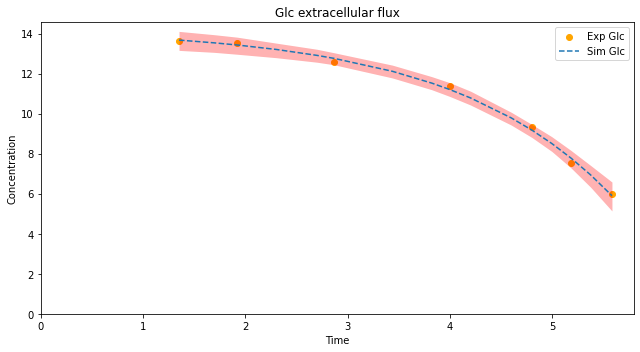

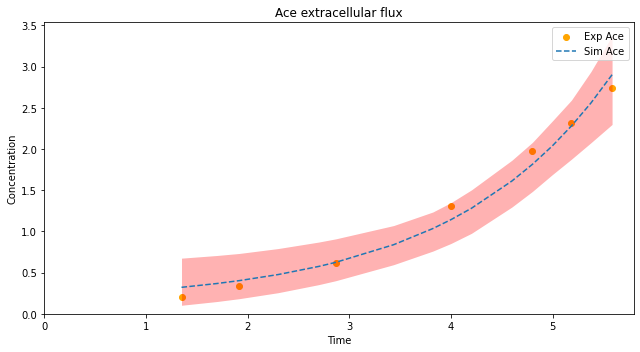

In [15]:
io_handler.local_out("data", "plot", "pdf")